# Fusion - get started

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fusion import Fusion

plt.style.use("bmh")

## Establish the connection

In [2]:
fusion = Fusion()

## Show the available functionality

In [3]:
fusion

Fusion object 
Available methods:
+-------------------------+
| catalog_resources       |
| dataset_resources       |
| datasetmember_resources |
| download                |
| get_fusion_filesystem   |
| list_catalogs           |
| list_dataset_attributes |
| list_datasetmembers     |
| list_datasets           |
| list_distributions      |
| list_products           |
| to_df                   |
| upload                  |
| default_catalog         |
+-------------------------+

## Access function documentation

In [4]:
fusion.to_df?

Signature:
fusion.to_df(
    dataset: str,
    dt_str: str = 'latest',
    dataset_format: str = 'parquet',
    catalog: str = None,
    n_par: int = None,
    show_progress: bool = True,
    columns: List = None,
    filters: List = None,
    force_download: bool = False,
    download_folder: str = None,
    **kwargs,
) -> pandas.core.frame.DataFrame
Docstring:
Gets distributions for a specified date or date range and returns the data as a dataframe.

Args:
    dataset (str): A dataset identifier
    dt_str (str, optional): Either a single date or a range identified by a start or end date,
        or both separated with a ":". Defaults to 'latest' which will return the most recent
        instance of the dataset.
    dataset_format (str, optional): The file format, e.g. CSV or Parquet. Defaults to 'parquet'.
    catalog (str, optional): A catalog identifier. Defaults to 'common'.
    n_par (int, optional): Specify how many distributions to download in parallel.
        Defaults to all

## Explore the datasets

In [5]:
fusion.list_datasets("FX")

,identifier,title,region,category,coverageStartDate,coverageEndDate,description
7,FX_EASIDX,Economic Activity Surprise Index (EASI) FX,"EMEA, North America, APAC, Emerging Markets, G...",Economics,2019-01-01,2023-01-04,The Economic Activity Surprise Index is publis...
15,FX_MEAN_IMM,FX Mean Reversion Strategies IMM,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2023-01-04,"The FX Mean Reversion, IMM dataset from J.P. M..."
19,FXO_SP,FX Cash Rate,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2023-01-04,This dataset includes FX spot rates for major ...
20,FXO_RR,FX Option Structure | Risk Reversal,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2023-01-04,Implied volatility for 10 and 25 delta FX opti...
21,FXO_ST,FX Option Structure | Strangles,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2023-01-04,Implied volatility for 10 and 25 delta FX opti...
34,FX-ECV-Post-Trade,FX ECV Post-Trade Report,Global,FX,NaN,NaN,FX ECV Post-Trade Report.
46,FX_ECONOMIC,FX Specialized | Momentum Strategies (Economics),"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2023-01-04,Momentum signals in a trend following strategy...
63,FXO_IV,FX Specialized | Option Implied Volatility,"EMEA, North America, APAC, Emerging Markets, G...",FX,2019-01-01,2023-01-04,Global FX option implied volatility data for a...
74,FX_JPM_TCI,FX Passive Index,"EMEA, North America, APAC, Global",FX,2019-01-01,2023-01-04,FX passive index level and currency sub-indices.
75,FX_MEAN_HFFV,FX Mean Reversion Strategies Hi Freq Fair Value,"EMEA, North America, APAC, Global",FX,2019-01-01,2023-01-04,The FX High Frequency Fair Value dataset from ...


## Display the attributes

In [6]:
fusion.list_dataset_attributes("FXO_SP")

,identifier,dataType,isDatasetKey,description
0,instrument_name,String,True,The instrument name
1,currency_pair,String,False,The currency pair
2,term,String,False,"The time period of an investment, agreement or..."
3,product,String,False,The product identifier
4,date,String,False,The snapshot date
5,fx_rate,Double,False,The spot and forward fx rate


## Download and load

In [7]:
df = fusion.to_df("FXO_SP", "20220101:20221231", columns=["currency_pair", "date", "fx_rate"], filters=[("currency_pair", "=", "GBPUSD")])

100%|████████████████████████████████████████| 258/258 [00:03<00:00, 68.80it/s]


## Analyze

In [8]:
df.head()

,currency_pair,date,fx_rate
0,GBPUSD,20220318,1.31705
1,GBPUSD,20220322,1.32590
2,GBPUSD,20220103,1.34475
3,GBPUSD,20220104,1.35530
4,GBPUSD,20220105,1.35660


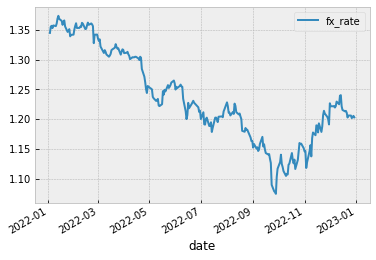

In [9]:
df["date"] = pd.to_datetime(df["date"].astype("str"))
df.sort_values("date").set_index("date").plot(grid=True);